# 1.Imports

In [68]:
import pandas as pd
import seaborn as sns

# 2. data

In [69]:
data1=pd.read_csv("churn-bigml-20.csv")
data2=pd.read_csv("churn-bigml-80.csv")

In [70]:
data=pd.concat([data1, data2])

In [71]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [72]:
data.count()

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

In [73]:
data.Churn.unique()

array([False,  True])

In [74]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['International plan'])
label1 = le.fit_transform(data['Voice mail plan'])
label2 = le.fit_transform(data['State'])
label3 = le.fit_transform(data['Churn'])
# printing label

# removing the column 'Purchased' from df
# as it is of no use now.
data.drop("International plan", axis=1, inplace=True)
data.drop("Voice mail plan", axis=1, inplace=True)
data.drop("State", axis=1, inplace=True)
data.drop("Churn", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'Purchased'
data["International plan"] = label
data["Voice mail plan"] = label1
data["State"] = label2
data["Churn"] = label3
# printing Dataframe
data


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan,State,Churn
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,18,0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,0,0,15,1
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,0,0,34,1
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,0,40,0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,0,40,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1,3,0
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,49,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,39,0


<AxesSubplot:>

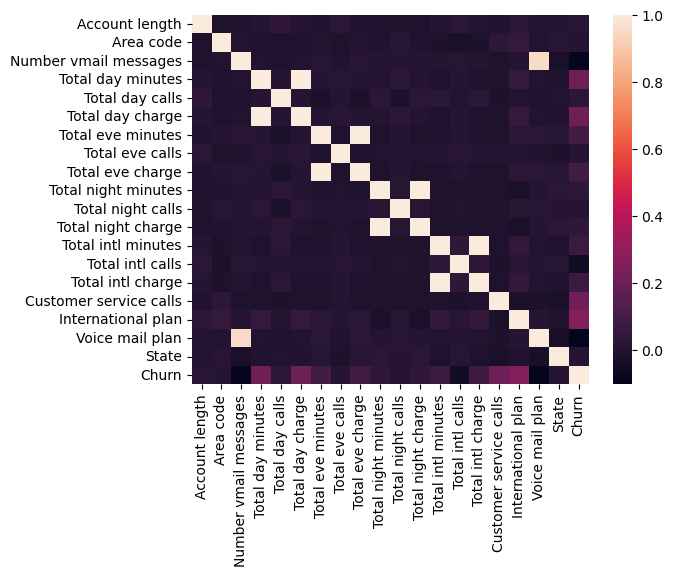

In [75]:
corr_matrix =data.corr()

#in comparison with others
corr_matrix["Churn"].sort_values(ascending=False)

#map draw
sns.heatmap(data.corr())
#drwing with mat

# 3.splitting and training model logistic regression

In [76]:
y = data["Churn"]
X= data.drop(["Churn"], axis=1)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.851


# 4. DecisionTreeClassifier model

In [78]:
from sklearn.tree import DecisionTreeClassifier
model1= DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.903


# 5.RandomForestRegressor

In [79]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.952


# 6.svm(supporet vector machine)

In [67]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.865
